In [1]:
#!pip install -U sahi
#!pip install -U inference rfdetr

# SAHI + Roboflow

This notebook demonstrates how to run object detection using Roboflow's [RF-DETR](https://github.com/roboflow/rfdetr) models in combination with [SAHI (Slicing Aided Hyper Inference)](https://github.com/obss/sahi) for improved detection performance—particularly on small objects. 

You can set the `model` parameter in one of **three ways**, depending on whether you're using a model from [Roboflow Universe](https://universe.roboflow.com/search?q=object%20detection) or a custom-trained RF-DETR model.

## Model Input Options

### ✅ Option 1: Roboflow Universe Model ID (as a string)

Use this when loading a model hosted on [Roboflow Universe](https://universe.roboflow.com/).

In [3]:
from sahi import AutoDetectionModel

detection_model = AutoDetectionModel.from_pretrained(
    model_type='roboflow',
    model='rfdetr-base',  # RoboFlow model ID as string
    confidence_threshold=0.5,
    device="cpu",
)

### ✅ Option 2: Use a Model Class (e.g. `RFDETRBase`)

Use this when you want to explicitly define the model class without instantiating it.

In [4]:
from sahi import AutoDetectionModel
from rfdetr import RFDETRBase
from rfdetr.util.coco_classes import COCO_CLASSES

detection_model = AutoDetectionModel.from_pretrained(
    model_type='roboflow',
    model=RFDETRBase,  # pass the class itself
    confidence_threshold=0.5,
    category_mapping=COCO_CLASSES,
    device="cpu",
)

06/06/2025 21:59:52 - WARNING - rfdetr.main -   num_classes mismatch: pretrain weights has 90 classes, but your model has 80 classes
reinitializing detection head with 90 classes


Loading pretrain weights


### ✅ Option 3: Use a Model Instance

Use this if you have a pre-loaded or trained model instance.

In [5]:
from sahi import AutoDetectionModel
from rfdetr import RFDETRBase
from rfdetr.util.coco_classes import COCO_CLASSES

detection_model = AutoDetectionModel.from_pretrained(
    model_type='roboflow',
    model=RFDETRBase(),  # pass an instance of a trained model
    confidence_threshold=0.5,
    category_mapping=COCO_CLASSES,
    device="cpu",
)

Loading pretrain weights


## Running Inference

Once your `detection_model` is initialized using any of the above methods, you can perform inference using SAHI’s slicing and prediction API:

In [6]:
from sahi.utils.file import download_from_url

download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')

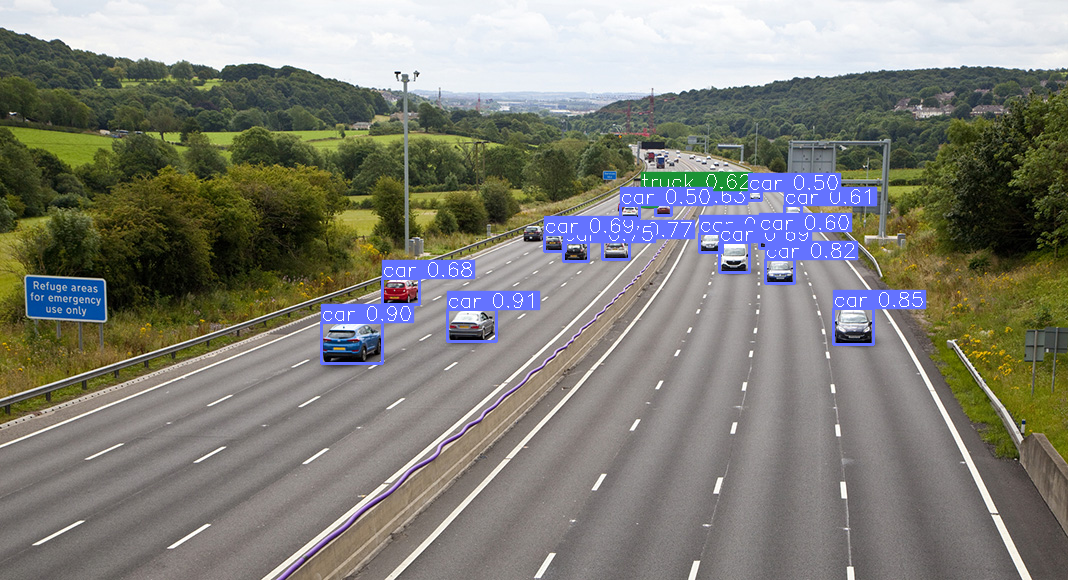

In [7]:
from sahi.predict import get_prediction, get_sliced_prediction
from IPython.display import Image

result = get_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
)
result.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png")

Performing prediction on 18 slices.


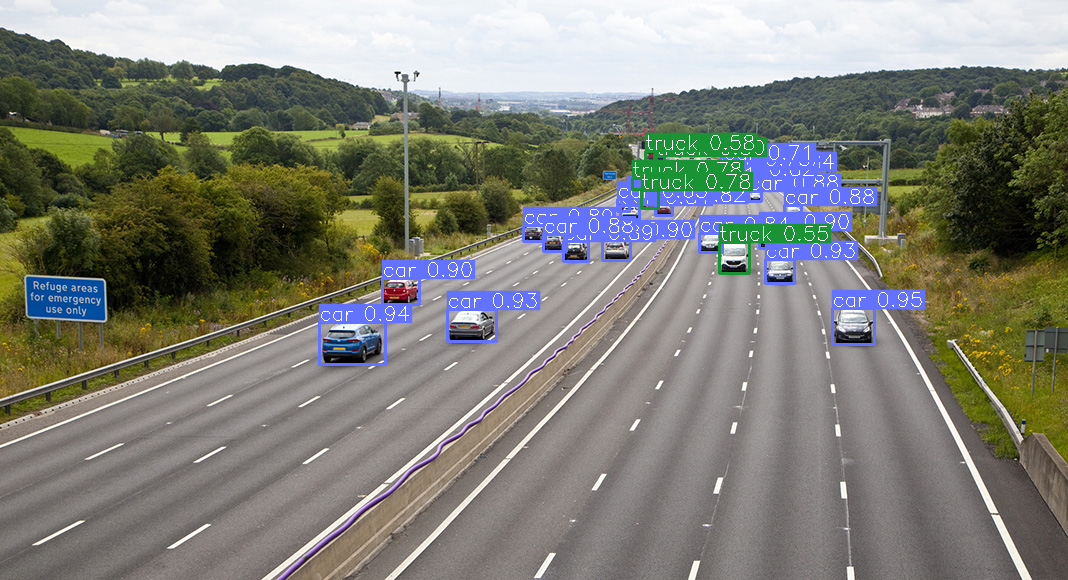

In [8]:
result_sliced = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 224,
    slice_width = 224,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
)
result_sliced.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png")